# $\chi ^2$分布と最小二乗法

Leo 4.2.4 を参考に。  
$n$個の独立変数$x_i$の平均、標準偏差がそれぞれ$\mu_i$, $\sigma_i$ のとき、


$$u = \chi^2 = \sum ^n _{i=1} \left( \frac{x_i-\mu_i}{\sigma_i} \right)^2 \tag{4.22}$$ 

で定義される量を$\chi ^2$と呼ぶ。 $x_i$ はランダム変数なので $u$ もランダム変数であり、次のような分布に従う。

$$ P(u) = \frac{u^{\nu/2-1}\exp(-u/2)}{2^{\nu/2}\Gamma(\nu/2)} \tag{4.23}$$

$\nu$は整数で$\Gamma(\nu/2)$はガンマ関数。$\nu$は自由度と呼ばれこの確率分布の唯一のパラメター。$\chi^2$分布を図示すると以下のようになる。

In [1]:
// color map 作成
unsigned int color_map[5] = {kBlack, kRed, kBlue, kMagenta, kCyan};

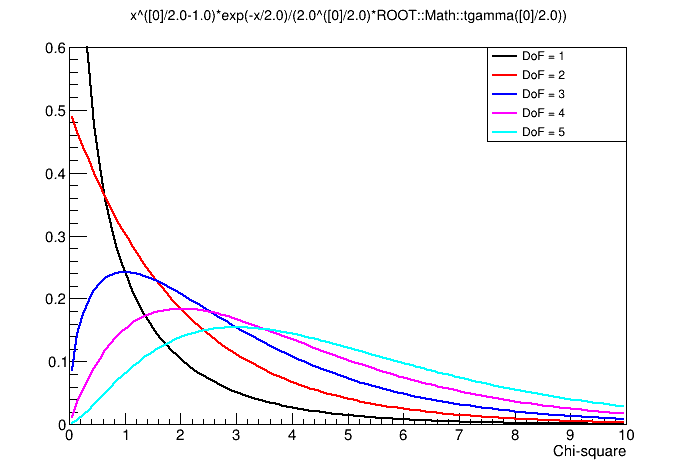

In [2]:
TCanvas *c1 = new TCanvas("c1", "c1");
TF1 *chi2[5];

for (auto i = 0; i < 5; ++i){
    chi2[i] = new TF1(Form("chi2_%d", i), "x^([0]/2.0-1.0)*exp(-x/2.0)/(2.0^([0]/2.0)*ROOT::Math::tgamma([0]/2.0))", 0, 10);
    // https://root.cern.ch/root/html/tutorials/math/GammaFun.C.html
    // gamma() は別の関数っぽい
    chi2[i]->SetParameter(0, i+1);
    chi2[i]->SetLineColor(color_map[i]);
}

chi2[0]->GetYaxis()->SetRangeUser(0, 0.6);
chi2[0]->GetXaxis()->SetTitle("Chi-square");
chi2[0]->Draw();

for (auto i = 1; i < 5; ++i){
    chi2[i]->Draw("same");
}

c1->Draw();

TLegend *l1 = new TLegend(0.7, 0.7, 0.9, 0.9);
for (auto i = 0; i < 5; ++i){
    l1->AddEntry(chi2[i], Form("DoF = %d", i+1) ,"l");
}
l1->Draw();

上記のことが実際に成り立つのかシミュレーションしてみる。$n=3$で、$x_i$ は適当な一様分布に従うとすると、

In [3]:
const int dof = 3;
const int nsamples = 10000;
vector<vector<double>> x(dof, vector<double>(nsamples));
vector<double> x_mean(dof);
vector<double> x_stdev(dof);

TRandom *rand1 = new TRandom();
for (auto i = 0; i < dof; ++i){
    for (auto j = 0; j < nsamples; ++j){
        // i^2 から (i+1)^2 の一様分布
        x[i][j] = rand1->Uniform(i*i, (i+1)*(i+1));
    }
    // C++17 では std::reduce のほうが速い
    x_mean[i] = accumulate(x[i].begin(), x[i].end(), 0.0) / x[i].size();
    x_stdev[i] = 0;
    double sum2 = 0.0;
    for (auto xx : x[i]){
        sum2 += xx*xx;
    }
    x_stdev[i] = sqrt(sum2/x[i].size() - x_mean[i]*x_mean[i]);
    cout << Form("mean = %f, stdev = %f", x_mean[i], x_stdev[i]) << endl;
}

mean = 0.501695, stdev = 0.287429
mean = 2.507003, stdev = 0.863652
mean = 6.504658, stdev = 1.456301


サンプルができたので、実際に(4.22)の分布を見てみる。

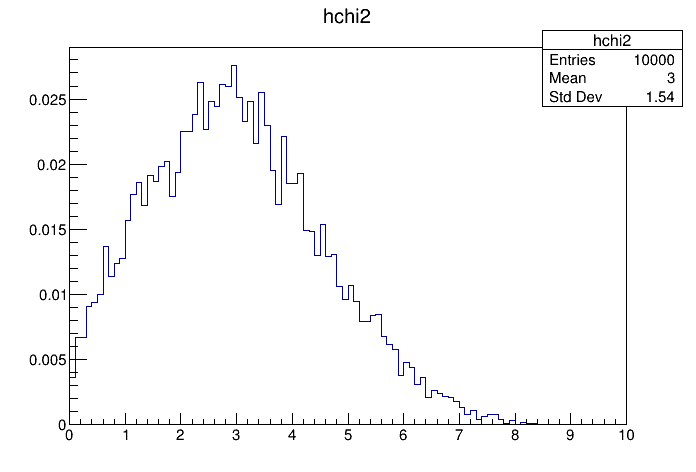

In [4]:
TCanvas *csim = new TCanvas("csim", "csim");
TH1D *hchi2 = new TH1D("hchi2", "hchi2", 100, 0, 10);

for (auto j = 0; j < nsamples; ++j){
    double sum = 0.0;
    for (auto i = 0; i < dof; ++i){
        sum += pow((x[i][j]-x_mean[i])/x_stdev[i], 2);
//        cout << x[i][j] << " " << x_mean[i] << " " << x_stdev[i] << endl;
    }
    hchi2->Fill(sum);
}
hchi2->Scale(1.0/hchi2->GetEntries());
hchi2->Draw("hist");
csim->Draw();
